In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from os import listdir

In [2]:
plot_len = 30

In [3]:
def file_len(fname):
    with open(fname) as f:
        for i, l in enumerate(f):
            pass
    return i + 1

In [4]:
def aggregateInterval (nclient, mode):
    # es  mode = [skeleton, tag, multi]
    path = "/Users/ettorepuccetti/Desktop/stored_log/"+mode+"/"+str(nclient)+"/interval/"
    list_files = [path+file for file in listdir(path) if not file.startswith('.')]
    lenghts = []
    for file in list_files:
        lenghts.append(file_len(file))
    min_len = plot_len
    log = pd.read_csv(list_files[0], header=None).values[:min_len]
    performanceAggr = log[:,1]
    for file in list_files[1:]:
        log = pd.read_csv(file, header=None).values[:min_len]
        performance = log[:,1]
        performanceAggr = np.column_stack((performanceAggr, performance))
    
    if (len(performanceAggr.shape)>1):
        avgAggr = np.sum(performanceAggr, axis = 1)
        stdAggr = np.std(performanceAggr, axis = 1)
        return [avgAggr,stdAggr,min_len]
    
    else:
        return [performanceAggr,np.zeros(min_len),min_len]
    

In [5]:
def aggregateForMean():
    aggrSkeleton = [[],[]]
    aggrMulti = [[],[]]
    aggrTag = [[],[]]
    for i in range(1,4):
        aggrSkeleton[0].append(aggregateInterval(i,"skeleton")[0])
        aggrSkeleton[1].append(aggregateInterval(i,"skeleton")[1])
        aggrMulti[0].append(aggregateInterval(i,"multi")[0])
        aggrMulti[1].append(aggregateInterval(i,"multi")[1])
        aggrTag[0].append(aggregateInterval(i,"Tag")[0])
        aggrTag[1].append(aggregateInterval(i,"Tag")[1])
    
    aggrSkeleton[0] = np.mean(aggrSkeleton[0],axis=0)
    aggrSkeleton[1] = np.mean(aggrSkeleton[1],axis=0)
    aggrMulti[0] = np.mean(aggrMulti[0],axis=0)
    aggrMulti[1] = np.mean(aggrMulti[1],axis=0)
    aggrTag[0] = np.mean(aggrTag[0],axis=0)
    aggrTag[1] = np.mean(aggrTag[1],axis=0)
    
    return [aggrSkeleton,aggrMulti,aggrTag]
        

In [9]:
def printAggr (avgAggr, stdAggr, length, label=""):
    plt.plot(np.arange(0.5, length/2+0.5, 0.5),avgAggr, linewidth=3.0,label=label)
    plt.fill_between(np.arange(0.5, length/2+0.5, 0.5), avgAggr + stdAggr/2, avgAggr - stdAggr/2, alpha=0.5)

In [27]:
def printOnePlot(skeleton, multi, tag):
    [avgSkeleton, stdSkeleton] = skeleton
    [avgMulti, stdMulti] = multi
    [avgTag, stdTag] = tag
    plt.figure(figsize=(12,8))
    plt.grid()
    plt.xticks(size=15)
    plt.yticks(size=15)
    printAggr(avgMulti, stdMulti, plot_len,"Multithread")
    printAggr(avgTag, stdTag, plot_len,"Tag cleaning")
    printAggr(avgSkeleton, stdSkeleton, plot_len, "Skeleton")
    plt.ylabel("Throughput [ops]", size = 15)
    plt.xlabel("time [s]", size = 15)
    plt.title("Mean Throughput for different number of clients, by time", size = 15)
    plt.legend(loc="lower right", fontsize = 15)
    #plt.plot([2,0],linestyle="--")
    plt.plot([2,2],[0,7500],linestyle="--",linewidth=3.0)
    plt.show()

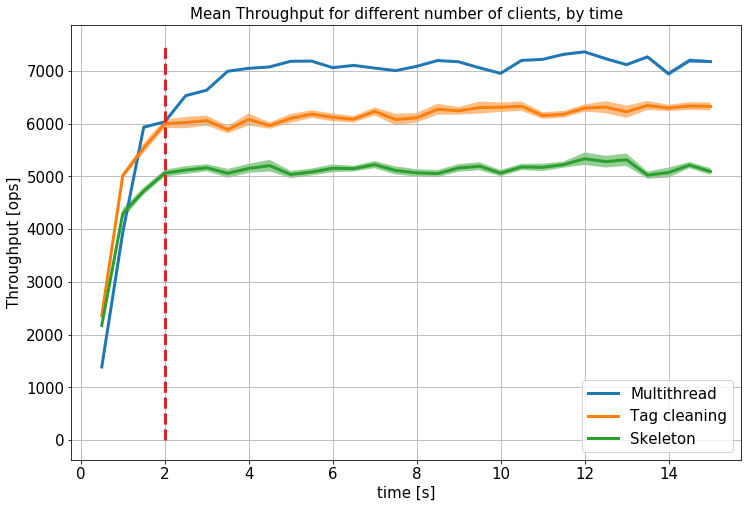

In [28]:
[aggrSkeleton,aggrMulti,aggrTag] = aggregateForMean()
printOnePlot(aggrSkeleton,aggrMulti,aggrTag)